In [1]:
import pandas as pd
from util import NAME, VALUE, TYPE, DATE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import pandas.plotting._converter as pandacnv
pandacnv.register()

In [3]:
data = pd.read_csv('./data/20180920_Kaufland_case_IoT_and_predictive_maintenance.csv', sep=';')
data.shape

(3860434, 7)

In [4]:
data.head()

ifm_analysis_sensordata_for_datathon_final.machine_name  \
0                                               RBG1        
1                                               RBG1        
2                                               RBG1        
3                                               RBG1        
4                                               RBG1        

  ifm_analysis_sensordata_for_datathon_final.sensor_type  \
0                                   drive_gear_V_eff       
1                                   drive_gear_V_eff       
2                                   drive_gear_V_eff       
3                                   drive_gear_V_eff       
4                                   drive_gear_V_eff       

  ifm_analysis_sensordata_for_datathon_final.date_measurement  \
0                                         2016-09-02            
1                                         2016-09-02            
2                                         2016-09-02            
3                                         2016-09-02            
4                                         2016-09-02            

  ifm_analysis_sensordata_for_datathon_final.start_timestamp  \
0                            2016-09-02 15:26:42.823           
1                            2016-09-02 15:26:45.653           
2                            2016-09-02 15:26:48.467           
3                            2016-09-02 15:26:51.293           
4                            2016-09-02 15:26:54.107           

  ifm_analysis_sensordata_for_datathon_final.end_timestamp  \
0                            2016-09-02 15:26:42.823         
1                            2016-09-02 15:26:45.653         
2                            2016-09-02 15:26:48.467         
3                            2016-09-02 15:26:51.293         
4                            2016-09-02 15:26:54.107         

   ifm_analysis_sensordata_for_datathon_final.realvalue  \
0                                              0.395      
1                                              0.577      
2                                              0.717      
3                                              0.832      
4                                              0.941      

  ifm_analysis_sensordata_for_datathon_final.unit  
0                                            mm/s  
1                                            mm/s  
2                                            mm/s  
3                                            mm/s  
4                                            mm/s

In [5]:
data[NAME].value_counts()

RBG7    1264573
RBG1     928255
RBG2     346060
RBG3     340404
RBG4     332969
RBG6     330710
RBG5     317463
Name: ifm_analysis_sensordata_for_datathon_final.machine_name, dtype: int64

In [6]:
def extract_sensor(machine=None, sensor=None):
    sensor = data[data[TYPE] == sensor]
    sensor = sensor[sensor[NAME] == machine]
    return sensor.copy()

In [7]:
def plot_time(col=DATE,data=None, mean=False):
    data[col] = data[col].map(lambda x: pd.Timestamp(x).to_pydatetime())
    if mean:
        mean_dict = {}
        for date in data[col].value_counts().index.values:
            #print(type(date))
            mean_dict[date] = data [ data[col] == pd.Timestamp(date)][VALUE].mean()
        
        plt.figure(figsize=(20,20))
        plt.plot_date([pd.Timestamp(k).to_pydatetime() for k,v in mean_dict.items()], [v for k,v in mean_dict.items()])
        plt.show()
        return
    plt.figure(figsize=(20,20))
    plt.plot_date(data[col], data[VALUE])
    plt.show()

In [8]:
drive_gear_2 = extract_sensor(machine='RBG2', sensor='drive_gear_V_eff')
drive_gear_2.shape

(21661, 7)

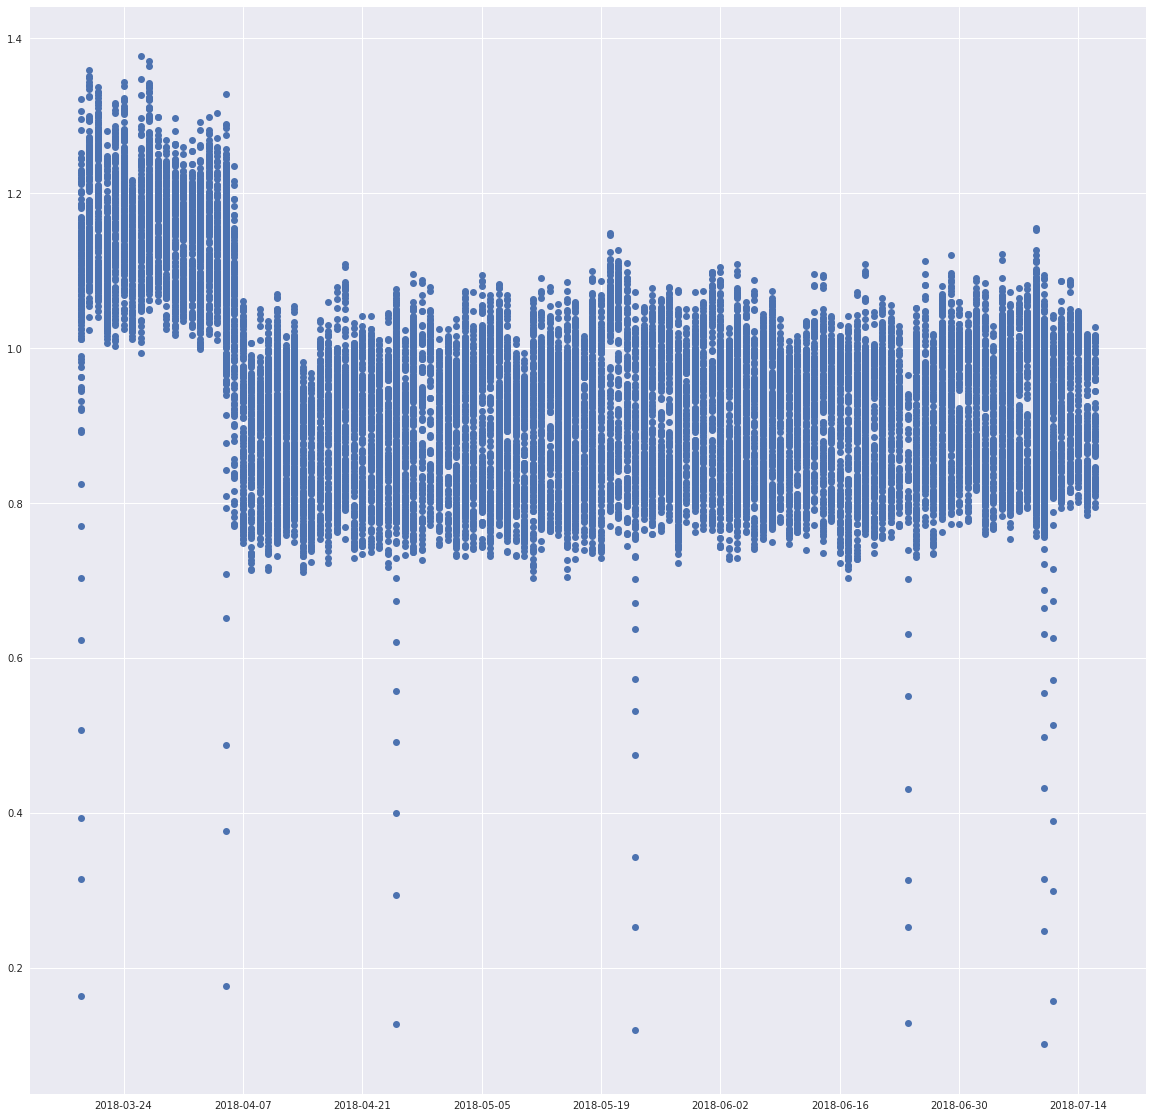

In [9]:
plot_time(data=drive_gear_2)

In [10]:
drive_gear_3 = extract_sensor(machine='RBG3', sensor='drive_gear_V_eff')
drive_gear_3.shape

(21084, 7)

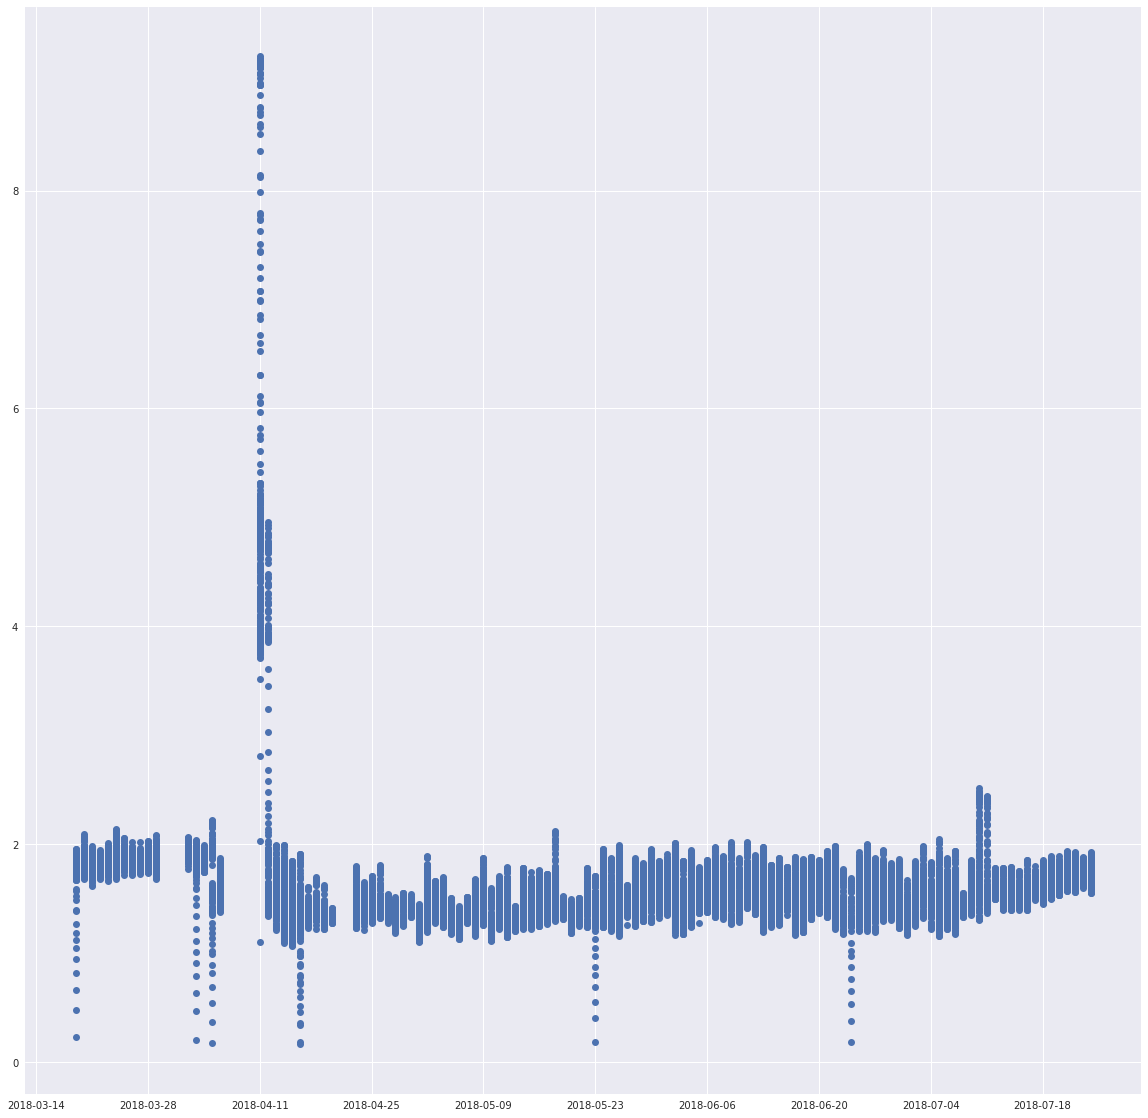

In [11]:
plot_time(data=drive_gear_3)

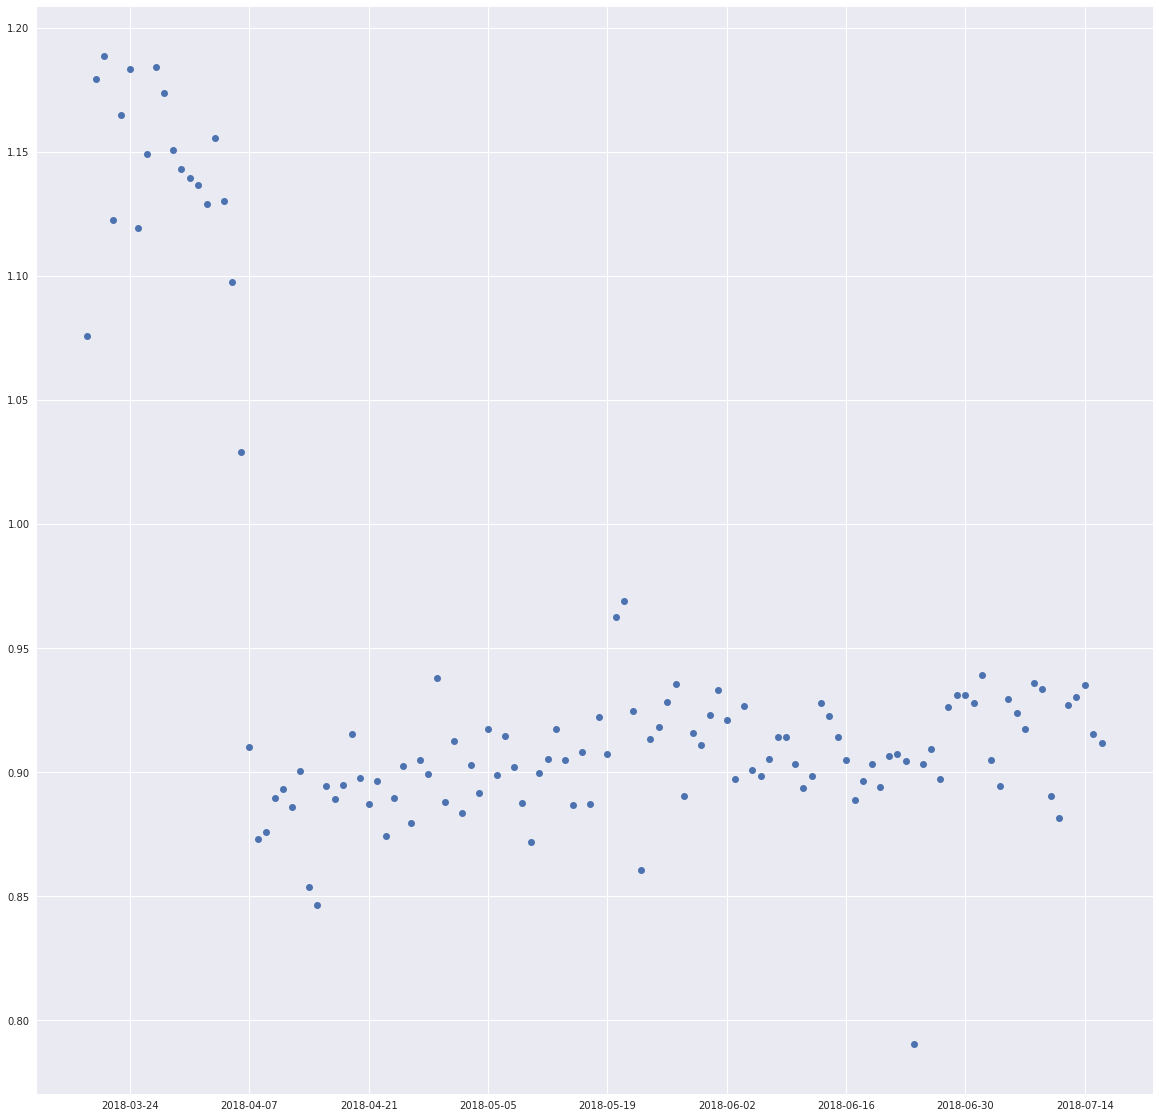

In [13]:
plot_time(data=drive_gear_2, mean=True)

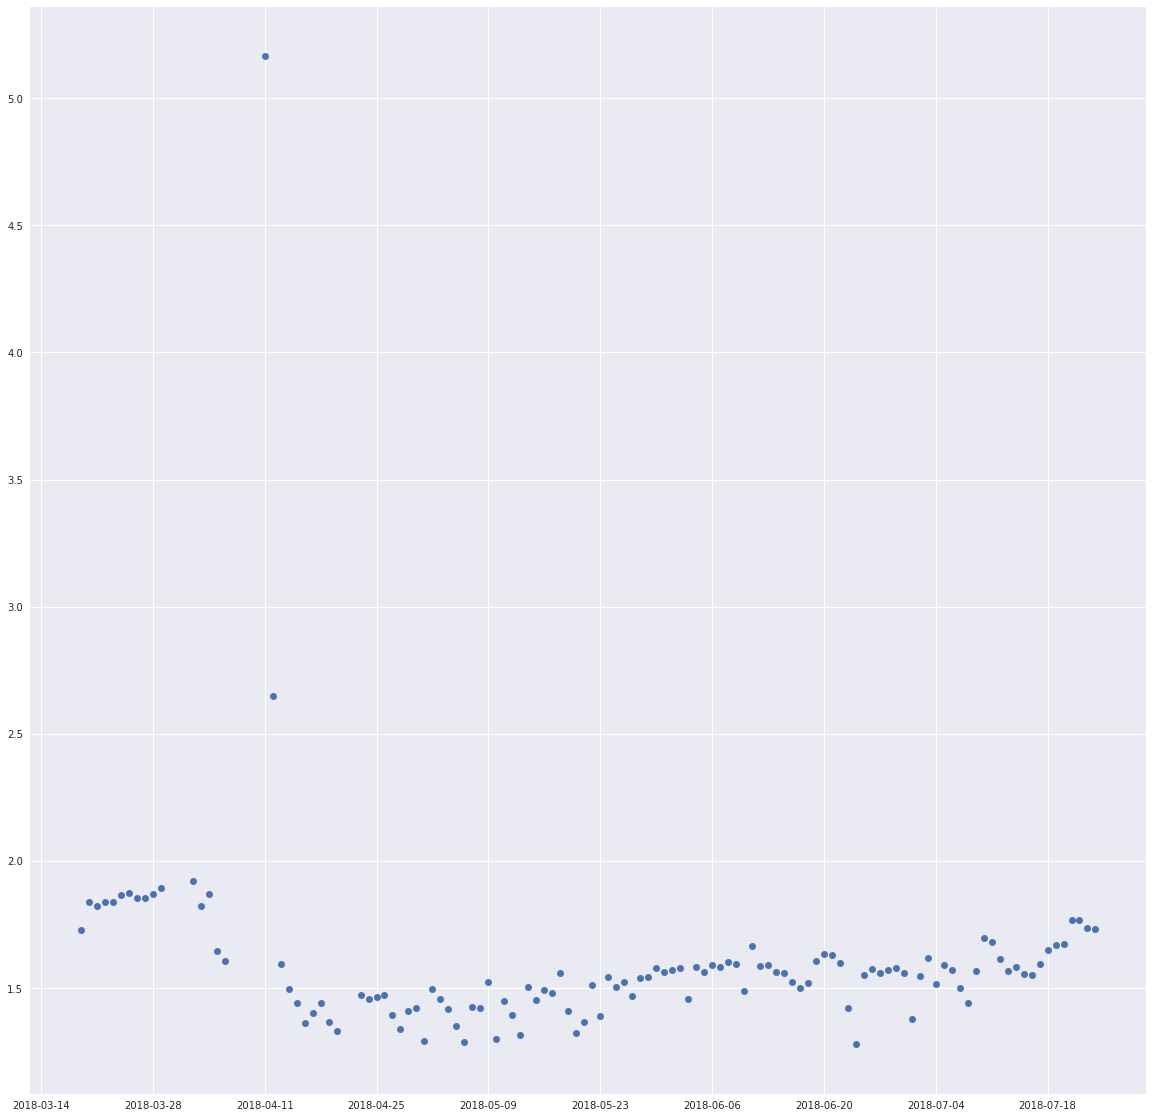

In [12]:
plot_time(data=drive_gear_3, mean=True)